In [11]:
import geopandas as gpd
import pickle

In [12]:
# geojson containing chennai zones outlines
chennai_zones = gpd.read_file("geojsons/chennai_zones.geojson")

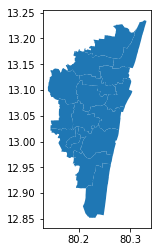

In [13]:
chennai_zones.plot()

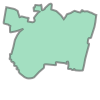

In [25]:
# Zone 13 outline - velachery
zone13 = chennai_zones.geometry[13]
zone13

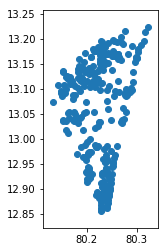

In [22]:
# Water sources in the city of chennai
chennai_water = gpd.read_file("geojsons/chennai_water.geojson")
chennai_water.plot()

In [16]:
from osmxtract import overpass
def get_geojson(bounds):
    query = overpass.ql_query(bounds, tag='building')
    response = overpass.request(query)
    return(response)

In [17]:
new_bound = (zone13.bounds[1],zone13.bounds[0],zone13.bounds[3],zone13.bounds[2])
buildings= get_geojson(new_bound)
buildings = overpass.as_geojson(buildings,"polygon")
buildings = gpd.GeoDataFrame.from_features(buildings)
bound_gdframe = gpd.GeoDataFrame({'geometry': [zone13]})
buildings = buildings[:10000]

In [18]:
#buildings_in_zone13 = gpd.overlay(buildings, bound_gdframe, how='intersection')

In [ ]:
# with open('geojson.pickle', 'wb') as handle:
#     pickle.dump(buildings_in_zone13, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('geojson.pickle', 'rb') as handle:
    buildings_in_zone13 = pickle.load(handle)

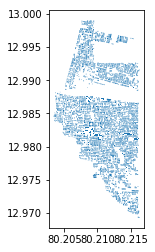

In [21]:
buildings_in_zone13.plot()